In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from collections import Counter
from collections import defaultdict
import seaborn as sns

### Obtaining all Names (Wikia)

In [113]:
#urlnames = "https://game8.co/games/Genshin-Impact/archives/296707"

#Web scraping the wikia for Genshin's playable character list.

urlnames_wk = "https://genshin-impact.fandom.com/wiki/Category:Playable_Characters"

pagenames_wk = requests.get(urlnames_wk)

soupname_wk = BeautifulSoup(pagenames_wk.text, "html.parser")

In [114]:
#Scraping through to get the html, identifying which class and identifier to find the names

imgtag_wk = soupname_wk.find_all("a", class_="category-page__member-link")
#imgtag

In [116]:
#Converting the soup into a usable List

type(imgtag_wk)

titles = [tag['title'] for tag in imgtag_wk]
characters_wk = titles[6:]

#Replacing spaces with underscores for it to be usable in iterating through the wikia pages

converter = lambda x: x.replace(' ', '_')
characters_wk = list(map(converter, characters_wk))
characters_wk = sorted(characters_wk)


remove = ["Lumine", "Traveler_(Unaligned)", "Traveler"]    #These characters are extras
characters_wk = [item for item in characters_wk if item not in remove]

print(characters_wk)

['Albedo', 'Alhaitham', 'Aloy', 'Amber', 'Arataki_Itto', 'Baizhu', 'Barbara', 'Beidou', 'Bennett', 'Candace', 'Charlotte', 'Chevreuse', 'Chiori', 'Chongyun', 'Collei', 'Cyno', 'Dehya', 'Diluc', 'Diona', 'Dori', 'Eula', 'Faruzan', 'Fischl', 'Freminet', 'Furina', 'Gaming', 'Ganyu', 'Gorou', 'Hu_Tao', 'Jean', 'Kaedehara_Kazuha', 'Kaeya', 'Kamisato_Ayaka', 'Kamisato_Ayato', 'Kaveh', 'Keqing', 'Kirara', 'Klee', 'Kujou_Sara', 'Kuki_Shinobu', 'Layla', 'Lisa', 'Lynette', 'Lyney', 'Mika', 'Mona', 'Nahida', 'Navia', 'Neuvillette', 'Nilou', 'Ningguang', 'Noelle', 'Qiqi', 'Raiden_Shogun', 'Razor', 'Rosaria', 'Sangonomiya_Kokomi', 'Sayu', 'Shenhe', 'Shikanoin_Heizou', 'Sucrose', 'Tartaglia', 'Thoma', 'Tighnari', 'Traveler_(Anemo)', 'Traveler_(Dendro)', 'Traveler_(Electro)', 'Traveler_(Geo)', 'Traveler_(Hydro)', 'Venti', 'Wanderer', 'Wriothesley', 'Xiangling', 'Xianyun', 'Xiao', 'Xingqiu', 'Xinyan', 'Yae_Miko', 'Yanfei', 'Yaoyao', 'Yelan', 'Yoimiya', 'Yun_Jin', 'Zhongli']


### Obtaining All Names (gg)

In [2]:
#Web scraping the wikia for Genshin's playable character list.

urlnames_gg = "https://genshin.gg/"

pagenames_gg = requests.get(urlnames_gg)

soupname_gg = BeautifulSoup(pagenames_gg.text, "html.parser")

In [3]:
#Scraping through to get the html, identifying which class and identifier to find the names

imgtag_gg = soupname_gg.find_all("h2", class_= "character-name")
#imgtag_gg

In [4]:
characters_gg = [element.get_text() for element in imgtag_gg]
#characters

def process_names(names_list):
    return [name.replace(" ", "").lower() for name in names_list]

characters_gg = process_names(characters_gg)
characters_gg = sorted(characters_gg)

print(characters_gg)

['albedo', 'alhaitham', 'aloy', 'amber', 'ayaka', 'ayato', 'baizhu', 'barbara', 'beidou', 'bennett', 'candace', 'charlotte', 'chevreuse', 'childe', 'chiori', 'chongyun', 'collei', 'cyno', 'dehya', 'diluc', 'diona', 'dori', 'eula', 'faruzan', 'fischl', 'freminet', 'furina', 'gaming', 'ganyu', 'gorou', 'heizou', 'hutao', 'itto', 'jean', 'kaeya', 'kaveh', 'kazuha', 'keqing', 'kirara', 'klee', 'kokomi', 'kukishinobu', 'layla', 'lisa', 'lynette', 'lyney', 'mika', 'mona', 'nahida', 'navia', 'neuvillette', 'nilou', 'ningguang', 'noelle', 'qiqi', 'raiden', 'razor', 'rosaria', 'sara', 'sayu', 'shenhe', 'sucrose', 'thoma', 'tighnari', 'traveler(anemo)', 'traveler(dendro)', 'traveler(electro)', 'traveler(geo)', 'traveler(hydro)', 'venti', 'wanderer', 'wriothesley', 'xiangling', 'xianyun', 'xiao', 'xingqiu', 'xinyan', 'yaemiko', 'yanfei', 'yaoyao', 'yelan', 'yoimiya', 'yunjin', 'zhongli']


### Tidying Up Names

In [41]:
#len(characters_wk)
#len(characters_gg)

#[characters_gg, characters_wk]
#names = arr(characters_gg & characters_wk)
#names

In [42]:
#print(characters_gg)

In [43]:
#print(characters_wk)

In [ ]:
remove_wk = ["Arataki_Itto", "Kaedehara_Kazuha", "Shikanoin_Heizou", "Kujou_Sara", "Tartaglia",
             "Kamisato_Ayato", "Kamisato_Ayaka", "Sangonomiya_Kokomi"]

characters_wk = [item for item in characters_wk if item not in remove_wk]
characters_wk = characters_wk + remove_wk
print(characters_wk)

In [5]:
remove_gg = ["itto", "kazuha", "heizou", "sara", "childe", "ayato", "ayaka", "kokomi"]


characters_gg = [item for item in characters_gg if item not in remove_gg]
characters_gg = characters_gg + remove_gg
print(characters_gg)

['albedo', 'alhaitham', 'aloy', 'amber', 'baizhu', 'barbara', 'beidou', 'bennett', 'candace', 'charlotte', 'chevreuse', 'chiori', 'chongyun', 'collei', 'cyno', 'dehya', 'diluc', 'diona', 'dori', 'eula', 'faruzan', 'fischl', 'freminet', 'furina', 'gaming', 'ganyu', 'gorou', 'hutao', 'jean', 'kaeya', 'kaveh', 'keqing', 'kirara', 'klee', 'kukishinobu', 'layla', 'lisa', 'lynette', 'lyney', 'mika', 'mona', 'nahida', 'navia', 'neuvillette', 'nilou', 'ningguang', 'noelle', 'qiqi', 'raiden', 'razor', 'rosaria', 'sayu', 'shenhe', 'sucrose', 'thoma', 'tighnari', 'traveler(anemo)', 'traveler(dendro)', 'traveler(electro)', 'traveler(geo)', 'traveler(hydro)', 'venti', 'wanderer', 'wriothesley', 'xiangling', 'xianyun', 'xiao', 'xingqiu', 'xinyan', 'yaemiko', 'yanfei', 'yaoyao', 'yelan', 'yoimiya', 'yunjin', 'zhongli', 'itto', 'kazuha', 'heizou', 'sara', 'childe', 'ayato', 'ayaka', 'kokomi']


In [14]:
#for i in range(50,80):
#    print(characters_gg2[i])
#    print(characters_wk2[i])

### Scraping Constellation Data

In [6]:
#Web Scraping Constellation Data from Genshin.gg - Complete

characters_gg_test = characters_gg[2:5]
cons_full = []

for names in characters_gg_test:
    
    url_chara_gg = "https://genshin.gg/characters/"+names+"/"
    page_chara_gg = requests.get(url_chara_gg)
    soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")
 

    #Obtaining the constellation html info
    
    if soup_chara_gg.find("div", id='constellations') != None:
        cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
        cons2 = [con.get_text() for con in cons1]
        cons2 = " ".join(cons2)
        #print(cons2)
        cons_full.append(cons2)
    
    else:
        #print("No Constellations")
        notext = "This character has no constellations."
        cons_full.append(notext)

In [7]:
cons_full

['This character has no constellations.',
 "Fires 2 arrows per Aimed Shot. The second arrow deals 20% of the first arrow's DMG. Baron Bunny, new and improved! Hitting Baron Bunny's foot with a fully-charged Aimed Shot manually detonates it. Explosion via manual detonation deals 200% additional DMG. Increases the Level of Fiery Rain by 3. Maximum upgrade level is 15. Decreases Explosive Puppet's CD by 20%. Adds 1 additional charge. Increase the Level of Explosive Puppet by 3. Maximum upgrade level is 15. Fiery Rain increases Amber's Movement SPD by 15% and Base ATK by 15% for 10s.",
 "Universal Diagnosis gains 1 additional charge. When your own active character hits a nearby opponent with their attacks, Baizhu will unleash a Gossamer Sprite: Splice. Gossamer Sprite: Splice will initiate 1 attack before returning, dealing 250% of Baizhu's ATK as Dendro DMG and healing for 20% of Universal Diagnosis's Gossamer Sprite's normal healing. DMG dealt this way is considered Elemental Skill DMG. 

### Scraping Dates Data

In [95]:
#Obtaining the release date of the Character

characters_wk_test = characters_wk[74:83]
dates_full = []

for names in characters_wk_test:

    url_chara_wk = "https://genshin-impact.fandom.com/wiki/"+names
    page_chara_wk = requests.get(url_chara_wk)
    soup_chara_wk = BeautifulSoup(page_chara_wk.content, "html.parser")
    
    
    release_date_div = soup_chara_wk.find('div', {'data-source': 'releaseDate'})
    #print(type(release_date_div))
    
    output = release_date_div.find('div', class_='pi-data-value').get_text(strip=True).split()[0:3]
    output[2] = output[2][:4]
    
    output = ' '.join(output)
    output = datetime.strptime(output, "%B %d, %Y").date()
    
    dates_full.append(output)


In [96]:
#dates_full

### Combining the Functions

In [196]:
characters_wk_test = characters_wk#[0:15]
characters_gg_test = characters_gg#[0:15]
cons_full = []
dates_full = []

for names in characters_gg_test:
    
    url_chara_gg = "https://genshin.gg/characters/"+names+"/"
    page_chara_gg = requests.get(url_chara_gg)
    soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")
 

    #Obtaining the constellation html info
    
    if soup_chara_gg.find("div", id='constellations') != None:
        cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
        cons2 = [con.get_text() for con in cons1]
        cons2 = " ".join(cons2)
        #print(cons2)
        cons_full.append(cons2)
    
    else:
        #print("No Constellations")
        notext = "This character has no constellations."
        cons_full.append(notext)
        
        
for names in characters_wk_test:

    url_chara_wk = "https://genshin-impact.fandom.com/wiki/"+names
    page_chara_wk = requests.get(url_chara_wk)
    soup_chara_wk = BeautifulSoup(page_chara_wk.content, "html.parser")
    
    
    release_date_div = soup_chara_wk.find('div', {'data-source': 'releaseDate'})
    
    output = release_date_div.find('div', class_='pi-data-value').get_text(strip=True).split()[0:3]
    output[2] = output[2][:4]
    
    output = ' '.join(output)
    output = datetime.strptime(output, "%B %d, %Y").date()
    
    dates_full.append(output)
    
#pairs = zip(dates_full, cons_full)
#my_dict = dict(pairs)
#my_dict

In [197]:
#len(my_dict)

In [202]:
#Check Length of data

print(len(cons_full))
print(len(dates_full))

84
84


In [240]:
#First Combined List, matching the release dates with the constellation descriptions

cons_full
dates_full

#matched_dict = {date: paragraph for date, paragraph in zip(dates_full, cons_full)}
#len(matched_dict)

combined_list = list(zip(dates_full, cons_full))
#combined_list

In [238]:
#Check Length of dictionary

len(combined_list)
type(combined_list)

#dates_full

list

In [237]:
#cons_full

In [241]:
#Generating a simple word count from the constellation descriptions.

List_count = []

for paragraph in cons_full:
    words = paragraph.split()
    word_count = sum(Counter(words).values())
    List_count.append(word_count)

print(List_count)
len(List_count)

[141, 252, 5, 92, 167, 117, 86, 111, 143, 196, 224, 303, 142, 205, 255, 242, 139, 136, 160, 121, 180, 129, 123, 338, 116, 146, 193, 188, 110, 120, 121, 137, 219, 125, 145, 230, 106, 100, 149, 172, 165, 234, 240, 236, 183, 66, 112, 102, 171, 116, 96, 193, 135, 108, 110, 149, 80, 126, 123, 124, 180, 119, 271, 358, 93, 263, 106, 111, 109, 106, 102, 201, 155, 135, 84, 106, 164, 149, 155, 111, 143, 121, 138, 175]


84

In [243]:
#Creating a second combined list, this time with the Release Dates and its associated word count of con descriptions

combined_list2 = list(zip(dates_full, List_count))
len(combined_list2)

#combined_list2

84

In [244]:
#Note: Failed attempts at making a dict with duplicate kets.
#Might need to try and generate an array and use data from that without creating a dict.

word_count_dict = dict([(date, count) for date, count in combined_list2])
len(word_count_dict)

your_dict = defaultdict(list)

# Populate the dictionary with the provided list using loop

for date, count in combined_list2:
    your_dict[date].append(count)

print(your_dict)

defaultdict(<class 'list'>, {datetime.date(2020, 12, 23): [141], datetime.date(2023, 1, 18): [252, 201], datetime.date(2021, 9, 1): [5, 171, 111], datetime.date(2020, 9, 28): [92, 117, 86, 111, 142, 139, 129, 110, 120, 137, 106, 165, 66, 112, 102, 116, 108, 80, 124, 119, 93, 111], datetime.date(2023, 5, 2): [167, 121], datetime.date(2022, 9, 28): [143, 255], datetime.date(2023, 11, 8): [196, 338], datetime.date(2024, 1, 9): [224], datetime.date(2024, 3, 13): [303], datetime.date(2022, 8, 24): [205, 149], datetime.date(2023, 3, 1): [242], datetime.date(2020, 11, 11): [136, 143], datetime.date(2022, 9, 9): [160], datetime.date(2021, 5, 18): [121], datetime.date(2022, 12, 7): [180, 271], datetime.date(2023, 9, 5): [123], datetime.date(2024, 1, 31): [116, 263], datetime.date(2021, 1, 12): [146], datetime.date(2021, 12, 14): [193, 164], datetime.date(2021, 3, 2): [188], datetime.date(2023, 5, 24): [219], datetime.date(2020, 10, 20): [125], datetime.date(2022, 6, 21): [145], datetime.date(20

In [276]:
#Using numpy to create a pseudo-dictitionary

list_count_array = np.array(List_count)
dates_full_array = np.array(dates_full)
cons_full_array = np.array(cons_full)
characters_wk_array = np.array(characters_wk)

your_dict_2 = np.array([list_count_array, dates_full_array, cons_full_array])
#your_dict_2

In [279]:
df1 = pd.DataFrame({'Character_Name': characters_wk_array,
                    'Release_Dates': dates_full,
                    'Constellation_Wordcount': List_count,
                    'Constellation_Description': cons_full_array})
display(df1)

Character_Name Release_Dates  Constellation_Wordcount  \
0               Albedo    2020-12-23                      141   
1            Alhaitham    2023-01-18                      252   
2                 Aloy    2021-09-01                        5   
3                Amber    2020-09-28                       92   
4               Baizhu    2023-05-02                      167   
..                 ...           ...                      ...   
79          Kujou_Sara    2021-09-01                      111   
80           Tartaglia    2020-11-11                      143   
81      Kamisato_Ayato    2022-03-30                      121   
82      Kamisato_Ayaka    2021-07-21                      138   
83  Sangonomiya_Kokomi    2021-09-21                      175   

                            Constellation_Description  
0   Transient Blossoms generated by Albedo's Abiog...  
1   When a Projection Attack hits an opponent, Uni...  
2               This character has no constellations.  
3   Fires 2 arrows per Aimed Shot. The second arro...  
4   Universal Diagnosis gains 1 additional charge....  
..                                                ...  
79  When Tengu Juurai grant characters ATK Bonuses...  
80  Decreases the CD of Foul Legacy: Raging Tide b...  
81  Shunsuiken DMG is increased by 40% against opp...  
82  When Kamisato Ayaka's Normal or Charged Attack...  
83  While donning the Ceremonial Garment created b...  

[84 rows x 4 columns]

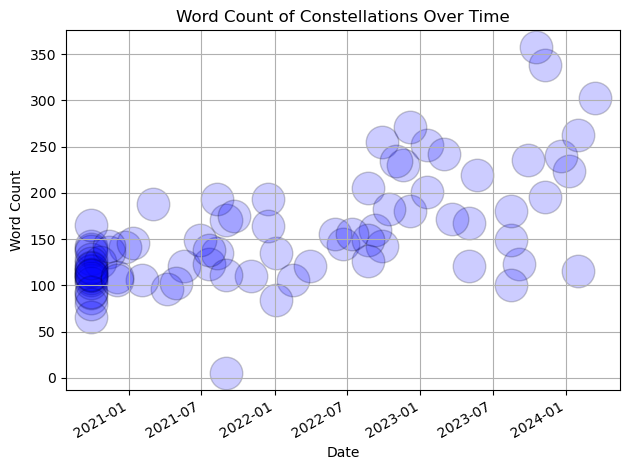

In [280]:
#Creating plots with the new data frame.

df1.plot.scatter(x='Release_Dates', y='Constellation_Wordcount', color='blue',
                 marker='o', edgecolor='black', alpha = 0.20, s=550)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Word Count of Constellations Over Time')

# Formatting x-axis ticks as dates
plt.xticks(rotation=30, ha='right')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [265]:
# Create scatter plot with KDE
#sns.jointplot(x='Release_Dates', y='Constellation_Wordcount', data=df1, kind='kde', cmap='Blues')

#plt.show()

# Testing

In [ ]:
characters_wk_test = characters_wk[3]
dates_full = []

for names in characters_wk_test:

    url_chara_wk = "https://genshin-impact.fandom.com/wiki/"+names
    page_chara_wk = requests.get(url_chara_wk)
    soup_chara_wk = BeautifulSoup(page_chara_wk.content, "html.parser")
    
    release_date_div = soup_chara_wk.find('div', {'data-source': 'releaseDate'})
    print(release_date_div)

In [ ]:
url_chara_wk = "https://genshin-impact.fandom.com/wiki/"+characters_wk[74]
page_chara_wk = requests.get(url_chara_wk)
soup_chara_wk = BeautifulSoup(page_chara_wk.content, "html.parser")

release_date_div = soup_chara_wk.find('div', {'data-source': 'releaseDate'})
release_date_div

In [154]:
characters_wk[3]

'Amber'

In [171]:
url_chara_wk = "https://genshin-impact.fandom.com/wiki/amber"    #+characters_wk[3]
page_chara_wk = requests.get(url_chara_wk)
soup_chara_wk = BeautifulSoup(page_chara_wk.content, "html.parser")

In [172]:
release_date_div = soup_chara_wk.find('div', {'data-source': 'releaseDate'})
release_date_div

<div class="pi-item pi-data pi-item-spacing pi-border-color" data-source="releaseDate">
<h3 class="pi-data-label pi-secondary-font"><a href="/wiki/Character/List#Characters_by_Release_Date" title="Character/List">Release Date</a></h3>
<div class="pi-data-value pi-font">September 28, 2020<br/>3 years, 6 months ago</div>
</div>

In [176]:
output = release_date_div.find('div', class_='pi-data-value').get_text(strip=True).split()[0:3]
output[2] = output[2][:4]

output = ' '.join(output)
output = datetime.strptime(output, "%B %d, %Y").date()

output

datetime.date(2020, 9, 28)

In [168]:
url_chara_gg = "https://genshin.gg/characters/"+characters_gg[3]+"/"
page_chara_gg = requests.get(url_chara_gg)
soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")

In [169]:
cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
cons2 = [con.get_text() for con in cons1]
cons2 = " ".join(cons2)
        #print(cons2)
        #cons_full.append(cons2)
    

        #print("No Constellations")
        #notext = "This character has no constellations."
        #cons_full.append(notext)
 
cons2

"Fires 2 arrows per Aimed Shot. The second arrow deals 20% of the first arrow's DMG. Baron Bunny, new and improved! Hitting Baron Bunny's foot with a fully-charged Aimed Shot manually detonates it. Explosion via manual detonation deals 200% additional DMG. Increases the Level of Fiery Rain by 3. Maximum upgrade level is 15. Decreases Explosive Puppet's CD by 20%. Adds 1 additional charge. Increase the Level of Explosive Puppet by 3. Maximum upgrade level is 15. Fiery Rain increases Amber's Movement SPD by 15% and Base ATK by 15% for 10s."

In [181]:
#pairs = zip(output, cons2)
#my_dict_test1 = dict(pairs)
#my_dict_test1

#dict(pairs)

dict_test = {output: cons2}
dict_test

{datetime.date(2020, 9, 28): "Fires 2 arrows per Aimed Shot. The second arrow deals 20% of the first arrow's DMG. Baron Bunny, new and improved! Hitting Baron Bunny's foot with a fully-charged Aimed Shot manually detonates it. Explosion via manual detonation deals 200% additional DMG. Increases the Level of Fiery Rain by 3. Maximum upgrade level is 15. Decreases Explosive Puppet's CD by 20%. Adds 1 additional charge. Increase the Level of Explosive Puppet by 3. Maximum upgrade level is 15. Fiery Rain increases Amber's Movement SPD by 15% and Base ATK by 15% for 10s."}

In [191]:
characters_wk_test = characters_wk[0:15]
characters_gg_test = characters_gg[0:15]
cons_full_test = []
dates_full_test = []

for names in characters_gg_test:
    
    url_chara_gg = "https://genshin.gg/characters/"+names+"/"
    page_chara_gg = requests.get(url_chara_gg)
    soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")
 

    #Obtaining the constellation html info
    
    if soup_chara_gg.find("div", id='constellations') != None:
        cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
        cons2 = [con.get_text() for con in cons1]
        cons2 = " ".join(cons2)
        #print(cons2)
        cons_full_test.append(cons2)
    
    else:
        #print("No Constellations")
        notext = "This character has no constellations."
        cons_full_test.append(notext)
        
        
for names in characters_wk_test:

    url_chara_wk = "https://genshin-impact.fandom.com/wiki/"+names
    page_chara_wk = requests.get(url_chara_wk)
    soup_chara_wk = BeautifulSoup(page_chara_wk.content, "html.parser")
    
    
    release_date_div = soup_chara_wk.find('div', {'data-source': 'releaseDate'})
    
    output = release_date_div.find('div', class_='pi-data-value').get_text(strip=True).split()[0:3]
    output[2] = output[2][:4]
    
    output = ' '.join(output)
    output = datetime.strptime(output, "%B %d, %Y").date()
    
    dates_full_test.append(output)
    
#pairs = zip(dates_full, cons_full)
#my_dict_test = dict(pairs)

In [187]:
#my_dict_test = {tuple(dates_full): dates_full, tuple(cons_full): dates_full}
#len(my_dict_test)

#my_dict_test

In [192]:
print(dates_full_test)
print(cons_full_test)

[datetime.date(2020, 12, 23), datetime.date(2023, 1, 18), datetime.date(2021, 9, 1), datetime.date(2020, 9, 28), datetime.date(2023, 5, 2), datetime.date(2020, 9, 28), datetime.date(2020, 9, 28), datetime.date(2020, 9, 28), datetime.date(2022, 9, 28), datetime.date(2023, 11, 8), datetime.date(2024, 1, 9), datetime.date(2024, 3, 13), datetime.date(2020, 9, 28), datetime.date(2022, 8, 24), datetime.date(2022, 9, 28)]
["Transient Blossoms generated by Albedo's Abiogenesis: Solar Isotoma regenerate 1.2 Energy for Albedo. Transient Blossoms generated by Abiogenesis: Solar Isotoma grant Albedo Fatal Reckoning for 30s: Each stack of Fatal Reckoning increases DMG by of Albedo's DEF. The effect stacks up to 4 times. Unleashing Rite of Progeniture: Tectonic Tide consumes all stacks of Fatal Reckoning, increasing the DMG dealt by the Tectonic Tide and Fatal Blossoms based on the number of stacks consumed. Increases the level of Abiogenesis: Solar Isotoma by 3. Maximum upgrade level is 15. Solar I

In [195]:
len(cons_full_test)

15

In [193]:
#my_dict_test

print(characters_gg)

['albedo', 'alhaitham', 'aloy', 'amber', 'baizhu', 'barbara', 'beidou', 'bennett', 'candace', 'charlotte', 'chevreuse', 'chiori', 'chongyun', 'collei', 'cyno', 'dehya', 'diluc', 'diona', 'dori', 'eula', 'faruzan', 'fischl', 'freminet', 'furina', 'gaming', 'ganyu', 'gorou', 'hutao', 'jean', 'kaeya', 'kaveh', 'keqing', 'kirara', 'klee', 'kukishinobu', 'layla', 'lisa', 'lynette', 'lyney', 'mika', 'mona', 'nahida', 'navia', 'neuvillette', 'nilou', 'ningguang', 'noelle', 'qiqi', 'raiden', 'razor', 'rosaria', 'sayu', 'shenhe', 'sucrose', 'thoma', 'tighnari', 'traveler(anemo)', 'traveler(dendro)', 'traveler(electro)', 'traveler(geo)', 'traveler(hydro)', 'venti', 'wanderer', 'wriothesley', 'xiangling', 'xianyun', 'xiao', 'xingqiu', 'xinyan', 'yaemiko', 'yanfei', 'yaoyao', 'yelan', 'yoimiya', 'yunjin', 'zhongli', 'itto', 'kazuha', 'heizou', 'sara', 'childe', 'ayato', 'ayaka', 'kokomi']


# Data Retry, with g8 instead of wk

In [8]:
url_g8 = "https://game8.co/games/Genshin-Impact/archives/307054"

In [10]:
page_chara_g8 = requests.get(url_g8)

In [11]:
soup_chara_g8 = BeautifulSoup(page_chara_g8.content, "html.parser")

In [106]:
#soup_chara_g8.find_all("a")

In [18]:
#Using the Built-in Pandas html reader

pandas_table_g8 = pd.read_html(url_g8)

In [107]:
dates_full_g8 = pandas_table_g8[7]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


#dates_full_g8 = dates_full_g8.drop(columns = ['Rarity', 'Element'])

dates_full_g8 = dates_full_g8.dropna()
dates_full_g8 = dates_full_g8.sort_values(by = ["Character"], axis = 0)
dates_full_g8.reset_index(drop=True, inplace=True)

#Fixing Aloy and Childe
dates_full_g8.loc[2, 'Release Date'] = "10/13/2021"
dates_full_g8.loc[44, 'Character'] = "childe"

#Fixing Release Date
dates_full_g8['Release Date'] = pd.to_datetime(dates_full_g8['Release Date'])

dates_full_g8

Release Date    Character Rarity  Element
0    2020-12-23       Albedo    ★ 5      Geo
1    2023-01-18    Alhaitham    ★ 5   Dendro
2    2021-10-13         Aloy    ★ 5     Cryo
3    2021-07-01        Ayaka    ★ 5     Cryo
4    2022-03-30        Ayato    ★ 5    Hydro
5    2023-05-02       Baizhu    ★ 5   Dendro
6    2022-09-28      Candace    ★ 4    Hydro
7    2023-11-08    Charlotte    ★ 4     Cryo
8    2024-01-09    Chevreuse    ★ 4     Pyro
9    2024-03-13       Chiori    ★ 5      Geo
10   2022-08-24       Collei    ★ 4   Dendro
11   2022-09-28         Cyno    ★ 5  Electro
12   2023-03-01        Dehya    ★ 5     Pyro
13   2020-11-11        Diona    ★ 4     Cryo
14   2022-09-09         Dori    ★ 4  Electro
15   2021-05-18         Eula    ★ 5     Cryo
16   2022-12-07      Faruzan    ★ 4    Anemo
17   2023-09-05     Freminet    ★ 4     Cryo
18   2023-11-08       Furina    ★ 5    Hydro
19   2024-01-31       Gaming    ★ 4     Pyro
20   2021-01-12        Ganyu    ★ 5     Cryo
21   2021-12-14        Gorou    ★ 4      Geo
22   2022-07-13       Heizou    ★ 4    Anemo
23   2021-03-02       Hu Tao    ★ 5     Pyro
24   2021-12-14         Itto    ★ 5      Geo
25   2023-05-02        Kaveh    ★ 4   Dendro
26   2021-06-29       Kazuha    ★ 5    Anemo
27   2023-05-24       Kirara    ★ 4   Dendro
28   2020-10-20         Klee    ★ 5     Pyro
29   2021-09-21       Kokomi    ★ 5    Hydro
30   2022-11-18        Layla    ★ 4     Cryo
31   2023-08-16      Lynette    ★ 4    Anemo
32   2023-08-16        Lyney    ★ 5     Pyro
33   2023-03-21         Mika    ★ 4     Cryo
34   2022-11-02       Nahida    ★ 5   Dendro
35   2023-12-20        Navia    ★ 5      Geo
36   2023-09-27  Neuvillette    ★ 5    Hydro
37   2022-10-14        Nilou    ★ 5    Hydro
38   2021-09-01       Raiden    ★ 5  Electro
39   2021-04-07      Rosaria    ★ 4     Cryo
40   2021-09-01         Sara    ★ 4  Electro
41   2021-08-10         Sayu    ★ 4    Anemo
42   2022-01-05       Shenhe    ★ 5     Cryo
43   2022-06-21      Shinobu    ★ 4  Electro
44   2020-11-11       childe    ★ 5    Hydro
45   2021-11-02        Thoma    ★ 4     Pyro
46   2022-08-24     Tighnari    ★ 5   Dendro
47   2020-09-27        Venti    ★ 5    Anemo
48   2022-12-07     Wanderer    ★ 5    Anemo
49   2023-10-17  Wriothesley    ★ 5     Cryo
50   2024-01-31      Xianyun    ★ 5    Anemo
51   2021-02-03         Xiao    ★ 5    Anemo
52   2020-12-01       Xinyan    ★ 4     Pyro
53   2022-02-16     Yae Miko    ★ 5  Electro
54   2021-04-28       Yanfei    ★ 4     Pyro
55   2023-01-18       Yaoyao    ★ 4   Dendro
56   2022-05-31        Yelan    ★ 5    Hydro
57   2021-08-10      Yoimiya    ★ 5     Pyro
58   2022-01-05      Yun Jin    ★ 4      Geo
59   2020-12-01      Zhongli    ★ 5      Geo

In [108]:
characters_g8 = dates_full_g8['Character'].tolist()
characters_g8 = [x.lower() for x in characters_g8]
characters_g8 = process_names(characters_g8)

print(len(characters_g8))
characters_g8

60


['albedo',
 'alhaitham',
 'aloy',
 'ayaka',
 'ayato',
 'baizhu',
 'candace',
 'charlotte',
 'chevreuse',
 'chiori',
 'collei',
 'cyno',
 'dehya',
 'diona',
 'dori',
 'eula',
 'faruzan',
 'freminet',
 'furina',
 'gaming',
 'ganyu',
 'gorou',
 'heizou',
 'hutao',
 'itto',
 'kaveh',
 'kazuha',
 'kirara',
 'klee',
 'kokomi',
 'layla',
 'lynette',
 'lyney',
 'mika',
 'nahida',
 'navia',
 'neuvillette',
 'nilou',
 'raiden',
 'rosaria',
 'sara',
 'sayu',
 'shenhe',
 'shinobu',
 'childe',
 'thoma',
 'tighnari',
 'venti',
 'wanderer',
 'wriothesley',
 'xianyun',
 'xiao',
 'xinyan',
 'yaemiko',
 'yanfei',
 'yaoyao',
 'yelan',
 'yoimiya',
 'yunjin',
 'zhongli']

In [109]:
#original_list = characters_g8
#old_value = 'Tartaglia'
#new_value = 'childe'

#replaced_list = [new_value if x == old_value else x for x in original_list]
#replaced_list

#characters_gg

In [67]:
#dates_full_g8 =

#to_change = dates_full_g8[dates_full_g8['Character'] == 'Aloy']
#to_change

#dates_full_g8.loc[2, 'Release Date'] = "10/13/2021"

In [111]:
#to_change['Release Date']

In [112]:
dates_full_g8["Release Date"].dtype

dtype('<M8[ns]')

In [97]:
#Web Scraping Constellation Data from Genshin.gg - Complete

characters_gg_test = characters_g8[0:60]
cons_full_g8 = []

for names in characters_gg_test:
    
    url_chara_gg = "https://genshin.gg/characters/"+names+"/"
    page_chara_gg = requests.get(url_chara_gg)
    soup_chara_gg = BeautifulSoup(page_chara_gg.content, "html.parser")
 

    #Obtaining the constellation html info
    
    if soup_chara_gg.find("div", id='constellations') != None:
        cons1 = soup_chara_gg.find("div", id="constellations").find_all("div", class_="character-skill-description")
        cons2 = [con.get_text() for con in cons1]
        cons2 = " ".join(cons2)
        #print(cons2)
        cons_full_g8.append(cons2)
    
    else:
        #print("No Constellations")
        notext = "This character has no constellations."
        cons_full_g8.append(notext)

In [113]:
len(cons_full_g8)

60

In [114]:
dates_full_g8['Constellation Description'] = cons_full_g8
dates_full_g8

Release Date    Character Rarity  Element  \
0    2020-12-23       Albedo    ★ 5      Geo   
1    2023-01-18    Alhaitham    ★ 5   Dendro   
2    2021-10-13         Aloy    ★ 5     Cryo   
3    2021-07-01        Ayaka    ★ 5     Cryo   
4    2022-03-30        Ayato    ★ 5    Hydro   
5    2023-05-02       Baizhu    ★ 5   Dendro   
6    2022-09-28      Candace    ★ 4    Hydro   
7    2023-11-08    Charlotte    ★ 4     Cryo   
8    2024-01-09    Chevreuse    ★ 4     Pyro   
9    2024-03-13       Chiori    ★ 5      Geo   
10   2022-08-24       Collei    ★ 4   Dendro   
11   2022-09-28         Cyno    ★ 5  Electro   
12   2023-03-01        Dehya    ★ 5     Pyro   
13   2020-11-11        Diona    ★ 4     Cryo   
14   2022-09-09         Dori    ★ 4  Electro   
15   2021-05-18         Eula    ★ 5     Cryo   
16   2022-12-07      Faruzan    ★ 4    Anemo   
17   2023-09-05     Freminet    ★ 4     Cryo   
18   2023-11-08       Furina    ★ 5    Hydro   
19   2024-01-31       Gaming    ★ 4     Pyro   
20   2021-01-12        Ganyu    ★ 5     Cryo   
21   2021-12-14        Gorou    ★ 4      Geo   
22   2022-07-13       Heizou    ★ 4    Anemo   
23   2021-03-02       Hu Tao    ★ 5     Pyro   
24   2021-12-14         Itto    ★ 5      Geo   
25   2023-05-02        Kaveh    ★ 4   Dendro   
26   2021-06-29       Kazuha    ★ 5    Anemo   
27   2023-05-24       Kirara    ★ 4   Dendro   
28   2020-10-20         Klee    ★ 5     Pyro   
29   2021-09-21       Kokomi    ★ 5    Hydro   
30   2022-11-18        Layla    ★ 4     Cryo   
31   2023-08-16      Lynette    ★ 4    Anemo   
32   2023-08-16        Lyney    ★ 5     Pyro   
33   2023-03-21         Mika    ★ 4     Cryo   
34   2022-11-02       Nahida    ★ 5   Dendro   
35   2023-12-20        Navia    ★ 5      Geo   
36   2023-09-27  Neuvillette    ★ 5    Hydro   
37   2022-10-14        Nilou    ★ 5    Hydro   
38   2021-09-01       Raiden    ★ 5  Electro   
39   2021-04-07      Rosaria    ★ 4     Cryo   
40   2021-09-01         Sara    ★ 4  Electro   
41   2021-08-10         Sayu    ★ 4    Anemo   
42   2022-01-05       Shenhe    ★ 5     Cryo   
43   2022-06-21      Shinobu    ★ 4  Electro   
44   2020-11-11       childe    ★ 5    Hydro   
45   2021-11-02        Thoma    ★ 4     Pyro   
46   2022-08-24     Tighnari    ★ 5   Dendro   
47   2020-09-27        Venti    ★ 5    Anemo   
48   2022-12-07     Wanderer    ★ 5    Anemo   
49   2023-10-17  Wriothesley    ★ 5     Cryo   
50   2024-01-31      Xianyun    ★ 5    Anemo   
51   2021-02-03         Xiao    ★ 5    Anemo   
52   2020-12-01       Xinyan    ★ 4     Pyro   
53   2022-02-16     Yae Miko    ★ 5  Electro   
54   2021-04-28       Yanfei    ★ 4     Pyro   
55   2023-01-18       Yaoyao    ★ 4   Dendro   
56   2022-05-31        Yelan    ★ 5    Hydro   
57   2021-08-10      Yoimiya    ★ 5     Pyro   
58   2022-01-05      Yun Jin    ★ 4      Geo   
59   2020-12-01      Zhongli    ★ 5      Geo   

                            Constellation Description  
0   Transient Blossoms generated by Albedo's Abiog...  
1   When a Projection Attack hits an opponent, Uni...  
2               This character has no constellations.  
3   When Kamisato Ayaka's Normal or Charged Attack...  
4   Shunsuiken DMG is increased by 40% against opp...  
5   Universal Diagnosis gains 1 additional charge....  
6   The duration of Prayer of the Crimson Crown ef...  
7   After Still Photo: Comprehensive Confirmation ...  
8   When the active character with the "Coordinate...  
9   The AoE of the automaton doll "Tamoto" summone...  
10  When in the party and not on the field, Collei...  
11  After using Sacred Rite: Wolf's Swiftness, Cyn...  
12  Dehya's Max HP is increased by 20%, and she de...  
13  Regenerates 15 Energy for Diona after the effe...  
14  The number of After-Sales Service Rounds creat...  
15  Every time Icetide Vortex's Grimheart stacks a...  
16  Faruzan can fire off a maximum of 2 Hurricane ...  
17  The CRIT Rate of Pressurized Floe: Shattering ...  
18  When u

In [115]:
#Generating a simple word count from the constellation descriptions.

List_count_g8 = []

for paragraph in cons_full_g8:
    words = paragraph.split()
    word_count = sum(Counter(words).values())
    List_count_g8.append(word_count)

print(List_count_g8)
len(List_count_g8)

[141, 252, 5, 138, 121, 167, 143, 196, 224, 303, 205, 255, 242, 136, 160, 121, 180, 123, 338, 116, 146, 193, 155, 188, 164, 121, 149, 219, 125, 175, 230, 100, 149, 172, 234, 240, 236, 183, 171, 96, 111, 193, 135, 5, 143, 110, 149, 119, 271, 358, 263, 106, 109, 106, 102, 201, 155, 135, 84, 106]


60

In [116]:
dates_full_g8['Word Count'] = List_count_g8
dates_full_g8

Release Date    Character Rarity  Element  \
0    2020-12-23       Albedo    ★ 5      Geo   
1    2023-01-18    Alhaitham    ★ 5   Dendro   
2    2021-10-13         Aloy    ★ 5     Cryo   
3    2021-07-01        Ayaka    ★ 5     Cryo   
4    2022-03-30        Ayato    ★ 5    Hydro   
5    2023-05-02       Baizhu    ★ 5   Dendro   
6    2022-09-28      Candace    ★ 4    Hydro   
7    2023-11-08    Charlotte    ★ 4     Cryo   
8    2024-01-09    Chevreuse    ★ 4     Pyro   
9    2024-03-13       Chiori    ★ 5      Geo   
10   2022-08-24       Collei    ★ 4   Dendro   
11   2022-09-28         Cyno    ★ 5  Electro   
12   2023-03-01        Dehya    ★ 5     Pyro   
13   2020-11-11        Diona    ★ 4     Cryo   
14   2022-09-09         Dori    ★ 4  Electro   
15   2021-05-18         Eula    ★ 5     Cryo   
16   2022-12-07      Faruzan    ★ 4    Anemo   
17   2023-09-05     Freminet    ★ 4     Cryo   
18   2023-11-08       Furina    ★ 5    Hydro   
19   2024-01-31       Gaming    ★ 4     Pyro   
20   2021-01-12        Ganyu    ★ 5     Cryo   
21   2021-12-14        Gorou    ★ 4      Geo   
22   2022-07-13       Heizou    ★ 4    Anemo   
23   2021-03-02       Hu Tao    ★ 5     Pyro   
24   2021-12-14         Itto    ★ 5      Geo   
25   2023-05-02        Kaveh    ★ 4   Dendro   
26   2021-06-29       Kazuha    ★ 5    Anemo   
27   2023-05-24       Kirara    ★ 4   Dendro   
28   2020-10-20         Klee    ★ 5     Pyro   
29   2021-09-21       Kokomi    ★ 5    Hydro   
30   2022-11-18        Layla    ★ 4     Cryo   
31   2023-08-16      Lynette    ★ 4    Anemo   
32   2023-08-16        Lyney    ★ 5     Pyro   
33   2023-03-21         Mika    ★ 4     Cryo   
34   2022-11-02       Nahida    ★ 5   Dendro   
35   2023-12-20        Navia    ★ 5      Geo   
36   2023-09-27  Neuvillette    ★ 5    Hydro   
37   2022-10-14        Nilou    ★ 5    Hydro   
38   2021-09-01       Raiden    ★ 5  Electro   
39   2021-04-07      Rosaria    ★ 4     Cryo   
40   2021-09-01         Sara    ★ 4  Electro   
41   2021-08-10         Sayu    ★ 4    Anemo   
42   2022-01-05       Shenhe    ★ 5     Cryo   
43   2022-06-21      Shinobu    ★ 4  Electro   
44   2020-11-11       childe    ★ 5    Hydro   
45   2021-11-02        Thoma    ★ 4     Pyro   
46   2022-08-24     Tighnari    ★ 5   Dendro   
47   2020-09-27        Venti    ★ 5    Anemo   
48   2022-12-07     Wanderer    ★ 5    Anemo   
49   2023-10-17  Wriothesley    ★ 5     Cryo   
50   2024-01-31      Xianyun    ★ 5    Anemo   
51   2021-02-03         Xiao    ★ 5    Anemo   
52   2020-12-01       Xinyan    ★ 4     Pyro   
53   2022-02-16     Yae Miko    ★ 5  Electro   
54   2021-04-28       Yanfei    ★ 4     Pyro   
55   2023-01-18       Yaoyao    ★ 4   Dendro   
56   2022-05-31        Yelan    ★ 5    Hydro   
57   2021-08-10      Yoimiya    ★ 5     Pyro   
58   2022-01-05      Yun Jin    ★ 4      Geo   
59   2020-12-01      Zhongli    ★ 5      Geo   

                            Constellation Description  Word Count  
0   Transient Blossoms generated by Albedo's Abiog...         141  
1   When a Projection Attack hits an opponent, Uni...         252  
2               This character has no constellations.           5  
3   When Kamisato Ayaka's Normal or Charged Attack...         138  
4   Shunsuiken DMG is increased by 40% against opp...         121  
5   Universal Diagnosis gains 1 additional charge....         167  
6   The duration of Prayer of the Crimson Crown ef...         143  
7   After Still Photo: Comprehensive Confirmation ...         196  
8   When the active character with the "Coordinate...         224  
9   The AoE of the automaton doll "Tamoto" summone...         303  
10  When in the party and not on the field, Collei...         205  
11  After using Sacred Rite: Wolf's Swiftness, Cyn...         255  
12  Dehya's Max HP is increased by 20%, and she de...         242  
13  Regenerates 15 Energy for Diona after the effe...         136  
14  The number of After-Sales Service Rounds creat... 

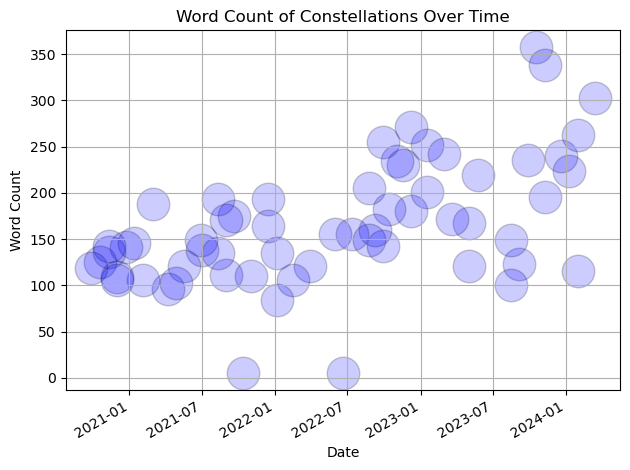

In [117]:
#Creating plots with the new data frame.

dates_full_g8.plot.scatter(x='Release Date', y='Word Count', color='blue',
                 marker='o', edgecolor='black', alpha = 0.20, s=550)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Word Count of Constellations Over Time')

# Formatting x-axis ticks as dates
plt.xticks(rotation=30, ha='right')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()